# завантаження даних

In [1]:
import pandas as pd
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=10000,
                           n_features=50, 
                           n_informative=15,  
                           n_redundant=5, 
                           n_classes=2,    
                           random_state=42)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

In [2]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0.907772,-5.800802,1.282142,-0.973585,-0.125093,0.991515,-0.969370,-0.241754,0.709575,-0.405561,...,0.002241,0.030261,-0.384403,1.267213,-2.302442,0.644302,0.839941,0.439138,1.801788,0
1,0.394115,7.833026,-1.046531,-0.664617,0.661866,-0.667256,1.209732,-0.464476,0.166383,-0.092287,...,0.099266,-1.298541,0.664261,8.559761,-0.156110,-2.440609,-2.829819,0.480106,1.616405,0
2,-0.672439,-0.255194,0.859754,-0.010499,0.189435,1.937226,0.461663,-1.822872,0.900614,-1.134586,...,-0.046446,-2.974730,-0.160547,-8.327980,3.445043,2.052011,-1.601498,1.894141,0.272705,0
3,1.008718,-4.803559,-2.027297,1.063074,-0.961103,-2.547186,-0.040760,-0.238769,-0.770226,0.732231,...,-0.087755,0.243236,-0.760708,-3.096284,1.605706,3.381356,0.166501,-0.000326,1.505257,1
4,-1.518907,14.056045,1.115506,1.141853,0.036612,0.294576,-0.612931,-1.173393,-4.250194,-0.250707,...,0.984038,-0.321471,-0.637729,14.387546,5.092689,-0.946542,5.851023,-1.003145,-0.301913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.174092,1.066129,-0.387853,-0.641078,0.717139,0.282782,-1.555169,-0.685916,0.606058,-0.311142,...,-0.057364,-1.757220,-0.313395,-5.996041,-0.868827,-1.012275,2.128078,0.021552,-1.001748,0
9996,-0.151462,10.046303,1.213772,-0.049283,-0.063130,1.281799,1.406623,-1.270210,0.157534,0.310150,...,-0.819249,0.091881,1.718183,1.831589,-1.015819,1.025221,4.186402,-0.196938,1.583238,1
9997,-0.377689,3.217540,-0.899410,-1.002683,1.661709,1.446170,0.165306,1.292795,3.404096,2.022608,...,-0.597215,-0.282597,0.890531,-0.607202,-2.224459,0.186376,1.348905,-0.895489,-0.273435,0
9998,-1.100562,2.638230,0.280797,-0.674596,0.278260,-0.634489,-0.592349,-1.313993,4.688974,-0.060522,...,-0.164981,-1.754142,1.020656,-12.113752,-0.740270,-1.060054,1.810408,-0.339495,-0.887908,0


# підготовка даних

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sequential

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

model1.add(Dense(units=30, activation='relu'))
model1.add(Dense(units=15, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x=X_train, y=y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.7351 - loss: 0.5266
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8531 - loss: 0.3402
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8892 - loss: 0.2739
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9161 - loss: 0.2214
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9365 - loss: 0.1801
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9482 - loss: 0.1524
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9559 - loss: 0.1321
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9640 - loss: 0.1185
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9684 - loss: 0.1066
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.9696 - loss: 0.0993


# Model

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model2 = Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision'])

history2 = model2.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5338 - precision: 0.7543 - recall: 0.6673 - val_loss: 0.3980 - val_precision: 0.8400 - val_recall: 0.7949
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.3293 - precision: 0.8676 - recall: 0.8569 - val_loss: 0.3115 - val_precision: 0.8872 - val_recall: 0.8525
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.2529 - precision: 0.9090 - recall: 0.8977 - val_loss: 0.2573 - val_precision: 0.9216 - val_recall: 0.8730
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.1977 - precision: 0.9327 - recall: 0.9244 - val_loss: 0.2112 - val_precision: 0.9381 - val_recall: 0.9170
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1618 - precision: 0.9439 - recall: 0.9406 - val_loss: 0.1908 - val_precision: 0.9413 - val_recall: 0.9238
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.1379 - precision: 0.9534 - recall: 0.9524 - val_loss: 0.1747 - val_precision: 0.9476 - v

# оцінка моделі

In [10]:
model1.evaluate(X_test, y_test, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9490 - loss: 0.1592


[0.15916240215301514, 0.9490000009536743]

In [9]:
history1.history

{'accuracy': [0.7351250052452087,
  0.8531249761581421,
  0.8892499804496765,
  0.9161249995231628,
  0.9365000128746033,
  0.9482499957084656,
  0.9558749794960022,
  0.9639999866485596,
  0.968375027179718,
  0.9696249961853027],
 'loss': [0.5266130566596985,
  0.3402252197265625,
  0.273870050907135,
  0.22135771811008453,
  0.18014605343341827,
  0.15235403180122375,
  0.13214987516403198,
  0.11852730810642242,
  0.10663954168558121,
  0.09929610788822174]}

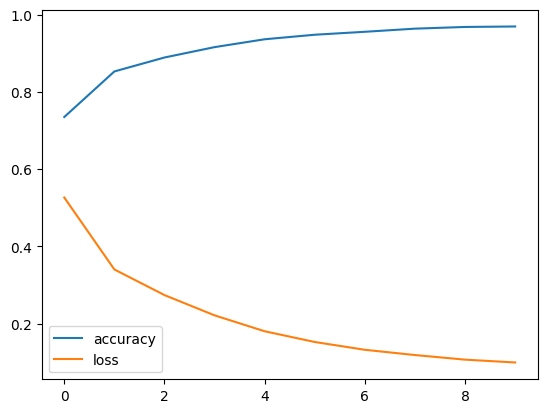

In [11]:
losses = pd.DataFrame(history1.history)
losses.plot();

## plot_loss_curves

In [12]:
from plot_loss_curves import plot_loss_curves

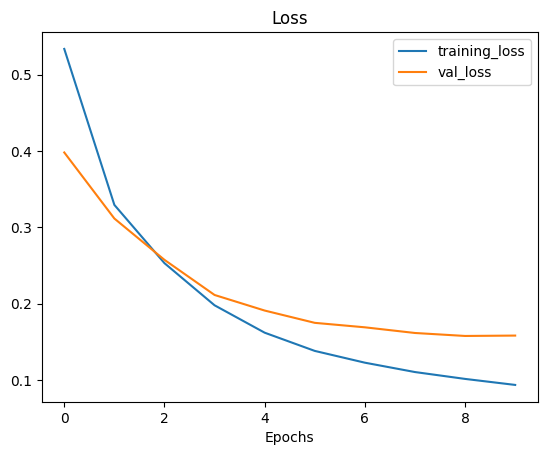

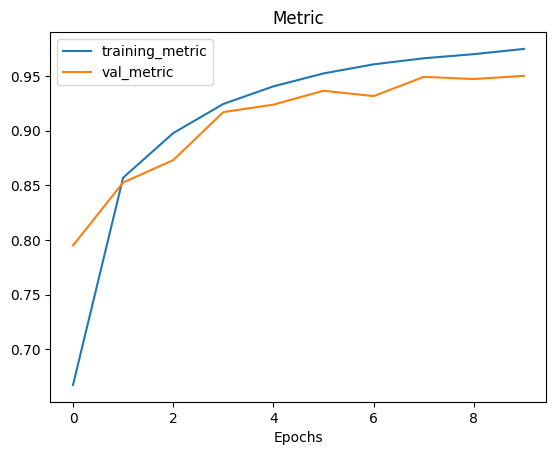

In [13]:
plot_loss_curves(history2, metric='recall')

## plot_mat

In [14]:
from plot_mat import plot_mat

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       976
           1       0.96      0.95      0.95      1024

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



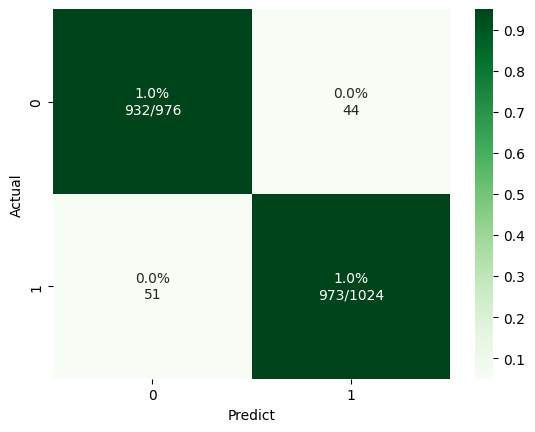

In [15]:
plot_mat(model2, X_test, y_test)

# визначаємо швидкість навчання

## lr_schedule_callback & define_learning_rate

In [16]:
from learning_rate import lr_schedule_callback, define_learning_rate

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model3 = Sequential()

model3.add(Dense(units=30, activation='relu'))
model3.add(Dense(units=15, activation='relu'))
model3.add(Dense(units=1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(x=X_train, y=y_train, epochs=500, callbacks=[lr_schedule_callback], verbose=0)

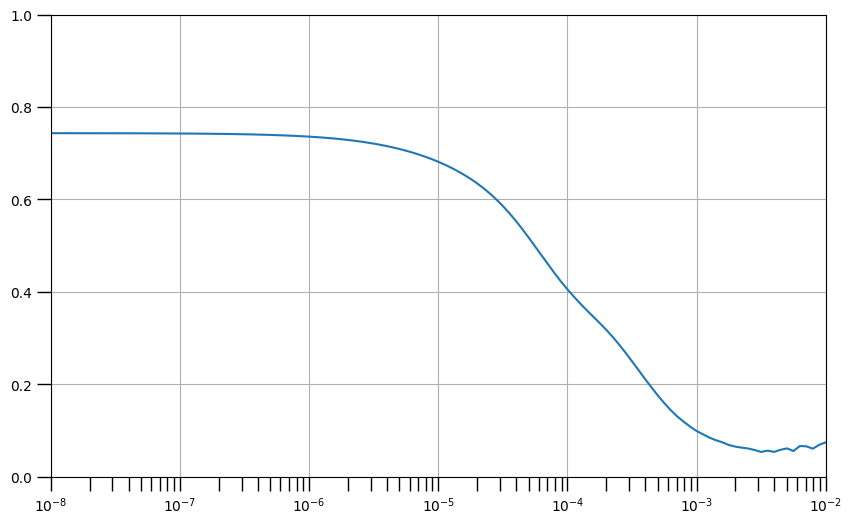

In [18]:
define_learning_rate(epoch = 500, history = history3, epoch_step = 20, start_lr = 1e-8, stop_lr = 1e-2, view = 1)

оптимальний рівень навчання стоїть в значенні на рівні $10^{-3}$, його і встановлюємо

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model4 = Sequential()

model4.add(Dense(units=30, activation='relu'))
model4.add(Dense(units=15, activation='relu'))
model4.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history4 = model4.fit(x=X_train, y=y_train, epochs=100, verbose=0)

## ReduceLROnPlateau

`monitor`: Вказує метрику, яку потрібно відстежувати (наприклад, val_loss).

`factor`: Коефіцієнт, на який буде зменшено швидкість навчання. Наприклад, якщо factor=0.2, то швидкість навчання буде зменшена на 20%.

`patience`: Кількість епох без покращення метрики, після яких швидкість навчання буде зменшено.

`min_lr`: Мінімальне значення швидкості навчання, до якого може бути зменшено значення швидкості навчання. Це запобігає надто малим значенням швидкості навчання, які можуть зробити навчання неефективним.

`verbose`: Якщо встановлено в 1, то буде виводитися інформація про зменшення швидкості навчання.

В цьому випадку, min_lr=1e-8 означає, що швидкість навчання не буде зменшена нижче за (10^{-8}).

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model5 = Sequential()

model5.add(Dense(units=30, activation='relu'))
model5.add(Dense(units=15, activation='relu'))
model5.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)
model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-8,
    verbose=1
)

history5 = model5.fit(x=X_train, y=y_train, epochs=100, callbacks=[reduce_lr], verbose=0)

# EarlyStopping

Колбек EarlyStopping використовується для зупинки тренування моделі, якщо метрика, яку відстежують, перестає покращуватися.

`monitor`: Метрика, яку потрібно відстежувати. У цьому випадку це val_loss (втрата на валідаційній вибірці).

`patience`: Кількість епох, протягом яких метрика може не покращуватися, перш ніж тренування буде зупинено. У цьому випадку це 5 епох.

`restore_best_weights`: Якщо встановлено в True, модель відновить ваги з епохи, коли метрика була найкращою.

Щоб встановити конкретне значення, при якому вважається, що вже немає покращення, можна використовувати параметр `min_delta` в колбеку EarlyStopping. Цей параметр визначає мінімальну зміну в моніторинговій метриці, яка вважається покращенням.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model6 = Sequential()

model6.add(Dense(units=30, activation='relu'))
model6.add(Dense(units=15, activation='relu'))
model6.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)
model6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    min_delta=0.001
)

history6 = model6.fit(x=X_train, y=y_train, epochs=1000, callbacks=[early_stopping_callback], verbose=1, validation_data=(X_test, y_test))

Epoch 1/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7606 - loss: 0.4949 - val_accuracy: 0.8105 - val_loss: 0.4121
Epoch 2/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8543 - loss: 0.3309 - val_accuracy: 0.8540 - val_loss: 0.3353
Epoch 3/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9001 - loss: 0.2567 - val_accuracy: 0.8875 - val_loss: 0.2720
Epoch 4/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9277 - loss: 0.2010 - val_accuracy: 0.9120 - val_loss: 0.2265
Epoch 5/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.9445 - loss: 0.1635 - val_accuracy: 0.9235 - val_loss: 0.1998
Epoch 6/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9546 - loss: 0.1383 - val_accuracy: 0.9355 - val_loss: 0.1776
Epoch 7/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9634 - loss: 0.1202 - val_accuracy: 0.9395 - val_loss: 0.1678
Epoch 8/1000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9691 -

# ModelCheckpoint

Цей код налаштовує збереження контрольних точок (checkpoints) для моделі машинного навчання.

`checkpoint_path` = "model_checkpoints.weights.h5": Задається шлях до файлу, в якому будуть зберігатися ваги моделі.

`monitor`="val_loss": метрика, яку потрібно відстежувати для збереження контрольних точок (в даному випадку це втрата на валідаційній вибірці).

`save_best_only`=True: зберігати тільки найкращу модель (з найменшою втратою).

`save_weights_only`=True: зберігати тільки ваги моделі, а не всю модель.

`verbose`=0: не виводити додаткову інформацію в консоль під час збереження.

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model7 = Model(inputs=input_layer, outputs=output_layer)

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision'])

checkpoint_path = "model_checkpoints.weights.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path,
                                    monitor="val_loss",
                                    save_best_only=True,
                                    save_weights_only=True,
                                    verbose=0)

history7 = model7.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[model_checkpoint], verbose=0)

In [29]:
import tensorflow as tf


cloned_model = tf.keras.models.clone_model(model7)
cloned_model.load_weights(checkpoint_path)
cloned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision'])

In [30]:
cloned_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1527 - precision: 0.9615 - recall: 0.9502 


[0.15267831087112427, 0.9501953125, 0.9614624381065369]

# BayesianOptimization

`build_model`: Функція, яка будує і повертає модель машинного навчання. Ця функція буде використовуватися для створення моделей під час процесу оптимізації.

`objective`="val_accuracy": Мета оптимізації. В даному випадку, це точність на валідаційній вибірці (val_accuracy). Оптимізатор буде намагатися максимізувати цю метрику.

`num_initial_points`=5: Кількість початкових точок, які будуть випадково вибрані для початку процесу оптимізації. Це допомагає алгоритму отримати початкове уявлення про простір гіперпараметрів.

`max_trials`=10: Максимальна кількість спроб (тестів) для пошуку найкращих гіперпараметрів. Оптимізатор буде будувати і оцінювати до 10 моделей.

`directory`="Kytaiskyi": Директорія, в якій будуть зберігатися результати оптимізації, включаючи журнали і контрольні точки моделей.

`project_name`="BayesianOptimization": Назва проекту. Це ім'я буде використовуватися для створення підкаталогу в директорії, зазначеній в параметрі directory, для зберігання результатів цього конкретного проекту.

In [33]:
from keras_tuner.tuners import BayesianOptimization

In [34]:
def build_custom_model(liers1, units1):

    input_layer = Input(shape=(X_train.shape[1],))

    x = Dense(units=units1, activation='relu')(input_layer)

    for _ in range(1, liers1 + 1):
        x = Dense(units=units1, activation='relu')(x)

    output_layer = Dense(units=1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


def build_model(hp):

    liers1 = hp.Int('liers1', min_value=1, max_value=3, step=1)
    units1 = hp.Int('units1', min_value=5, max_value=30, step=5)

    model = build_custom_model(liers1, units1)

    return model


tuner = BayesianOptimization(
    build_model,
    objective="val_accuracy",
    num_initial_points=5,
    max_trials=10,
    directory="BayesianOptimization",
    project_name="model8"
)

history8 = tuner.search(
    X_train, y_train,
    epochs=20,
    validation_data = (X_test, y_test)
)

Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.9559999704360962

Best val_accuracy So Far: 0.9570000171661377
Total elapsed time: 00h 00m 47s


In [38]:
tuner.results_summary()

Results summary
Results in BayesianOptimization/model8
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
liers1: 2
units1: 30
Score: 0.9570000171661377

Trial 01 summary
Hyperparameters:
liers1: 1
units1: 15
Score: 0.9559999704360962

Trial 09 summary
Hyperparameters:
liers1: 1
units1: 15
Score: 0.9559999704360962

Trial 05 summary
Hyperparameters:
liers1: 1
units1: 25
Score: 0.9549999833106995

Trial 06 summary
Hyperparameters:
liers1: 2
units1: 15
Score: 0.9524999856948853

Trial 00 summary
Hyperparameters:
liers1: 3
units1: 30
Score: 0.9509999752044678

Trial 08 summary
Hyperparameters:
liers1: 3
units1: 30
Score: 0.9490000009536743

Trial 07 summary
Hyperparameters:
liers1: 2
units1: 30
Score: 0.9470000267028809

Trial 03 summary
Hyperparameters:
liers1: 3
units1: 10
Score: 0.9449999928474426

Trial 02 summary
Hyperparameters:
liers1: 2
units1: 5
Score: 0.9375


In [40]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Functional name=functional, built=True>

In [41]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9570 - loss: 0.1643


[0.16433948278427124, 0.9570000171661377]

# model.fit параметри

## steps_per_epoch & validation_steps

steps_per_epoch=None,
    steps_per_epoch: це ціле число або None, яке вказує на кількість кроків,
    які будуть брати участь у кожній епосі. Якщо steps_per_epoch = None,
    то кількість кроків буде розраховуватись автоматично згідно з розміром даних

    steps_per_epoch=0.1*len(X_train) - означає що будуть братися лише
    10 відсотків данних для навчання
    
validation_steps=None,
    validation_steps: це ціле число або None, яке вказує на кількість кроків,
    які будуть виконані під час перевірки моделі. Якщо validation_steps = None,
    то кількість кроків буде розраховуватись автоматично згідно з розміром даних перевірки

    validation_steps=0.1*len(X_test) - валідація буде перевірятися лише на 10
    відсотках валідаційних данних

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model9 = Model(inputs=input_layer, outputs=output_layer)

model9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision'])

steps_per_epoch = int(0.5 * len(X_train))
validation_steps = int(0.5 * len(X_test))
history9 = model9.fit(x=X_train, y=y_train, epochs=10, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, verbose=1)

Epoch 1/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 502us/step - loss: 0.3500 - precision: 0.8468 - recall: 0.8312
Epoch 2/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 455us/step - loss: 0.1595 - precision: 0.9447 - recall: 0.9421
Epoch 3/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - loss: 0.1203 - precision: 0.9612 - recall: 0.9599
Epoch 4/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step - loss: 0.1000 - precision: 0.9676 - recall: 0.9705
Epoch 5/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - loss: 0.0877 - precision: 0.9729 - recall: 0.9771
Epoch 6/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step - loss: 0.0777 - precision: 0.9759 - recall: 0.9786
Epoch 7/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 509us/step - loss: 0.0704 - precision: 0.9794 - recall: 0.9821
Epoch 8/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step - loss: 0.0640 - precision: 0.9799 - recall: 0.9809
Epoch 9/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 481us/step - loss: 0.0578 - precision: 0.9814 - recall: 0.9829
Epoch 10/10
4000/4000 ━━━━━━

## initial_epoch

initial_epoch=0,

    initial_epoch: це ціле число, яке вказує на номер епохи, з якої почнеться навчання,
    тобто можна перезаписати навчання моделі і зробити це з конерктної епохи

при комбінації з `steps_per_epoch` можна почати вчити модель на певному обьємі даних і довчати при досягненні певних значень метрик вже на повному обьємі

In [43]:
history10 = model9.fit(x=X_train, y=y_train, epochs=15, verbose=1, initial_epoch=10)

Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.0375 - precision: 0.9889 - recall: 0.9907
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.0309 - precision: 0.9922 - recall: 0.9940
Epoch 13/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0281 - precision: 0.9925 - recall: 0.9947
Epoch 14/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.0265 - precision: 0.9932 - recall: 0.9955
Epoch 15/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.0251 - precision: 0.9940 - recall: 0.9960


## validation_split

validation_split=0.0,

    validation_split: частка даних, які будуть використовуватися для перевірки
    моделі під час навчання

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model11 = Model(inputs=input_layer, outputs=output_layer)

model11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision'])

histor11 = model11.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5723 - precision: 0.7333 - recall: 0.5840 - val_loss: 0.4393 - val_precision: 0.8117 - val_recall: 0.7842
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.3696 - precision: 0.8365 - recall: 0.8371 - val_loss: 0.3483 - val_precision: 0.8463 - val_recall: 0.8432
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.2956 - precision: 0.8794 - recall: 0.8736 - val_loss: 0.2917 - val_precision: 0.8752 - val_recall: 0.8795
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.2388 - precision: 0.9038 - recall: 0.9029 - val_loss: 0.2455 - val_precision: 0.8969 - val_recall: 0.9059
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.1962 - precision: 0.9281 - recall: 0.9231 - val_loss: 0.2150 - val_precision: 0.8954 - val_recall: 0.9448
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.1637 - precision: 0.9429 - recall: 0.9426 - val_loss: 0.1865 - val_precision: 0.9127 - v

## class_weight

class_weight=None,

    class_weight: ваги, які надаються класам для рівномірного розподілу уваги
    між ними під час навчання

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


y_train = np.array(y_train)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model14 = Model(inputs=input_layer, outputs=output_layer)

model14.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'precision'])

histor14 = model14.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, verbose=1, class_weight=class_weight_dict)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5501 - precision: 0.6982 - recall: 0.7605 - val_loss: 0.4092 - val_precision: 0.8292 - val_recall: 0.7980
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.3556 - precision: 0.8639 - recall: 0.8223 - val_loss: 0.3189 - val_precision: 0.8720 - val_recall: 0.8545
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.2813 - precision: 0.8992 - recall: 0.8683 - val_loss: 0.2627 - val_precision: 0.9079 - val_recall: 0.8783
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.2268 - precision: 0.9285 - recall: 0.9001 - val_loss: 0.2232 - val_precision: 0.9188 - val_recall: 0.9084
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.1842 - precision: 0.9409 - recall: 0.9281 - val_loss: 0.1938 - val_precision: 0.9291 - val_recall: 0.9373
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.1569 - precision: 0.9489 - recall: 0.9420 - val_loss: 0.1771 - val_precision: 0.9310 - v

In [46]:
class_weight_dict

{0: 0.9925558312655087, 1: 1.0075566750629723}

# model.compile

## кастомна loss функція

### recall

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model12 = Model(inputs=input_layer, outputs=output_layer)

recall_metric = tf.keras.metrics.Recall()

def custom_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()
    bce_loss = bce(y_true, y_pred)
    recall_metric.update_state(y_true, y_pred)
    recall_loss = 1 - recall_metric.result()
    return bce_loss + recall_loss

model12.compile(optimizer='adam', loss=custom_loss,  metrics=['recall', 'precision', 'accuracy'])

histor12 = model12.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6767 - loss: 1.0047 - precision: 0.6741 - recall: 0.6735 - val_accuracy: 0.7875 - val_loss: 0.7701 - val_precision: 0.7911 - val_recall: 0.7792
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8356 - loss: 0.6566 - precision: 0.8485 - recall: 0.8137 - val_accuracy: 0.8512 - val_loss: 0.5923 - val_precision: 0.8772 - val_recall: 0.8156
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.8791 - loss: 0.5312 - precision: 0.8955 - recall: 0.8560 - val_accuracy: 0.8800 - val_loss: 0.5003 - val_precision: 0.8965 - val_recall: 0.8582
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9072 - loss: 0.4449 - precision: 0.9191 - recall: 0.8913 - val_accuracy: 0.9019 - val_loss: 0.4269 - val_precision: 0.9199 - val_recall: 0.8795
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9253 - loss: 0.3774 - precision: 0.9340 - recall: 0.9140 - val_accuracy: 0.9187 - val_

### precision

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

input_layer = Input(shape=(X_train.shape[1],))
x = Dense(units=30, activation='relu')(input_layer)
x = Dense(units=15, activation='relu')(x)
output_layer = Dense(units=1, activation='sigmoid')(x)

model13 = Model(inputs=input_layer, outputs=output_layer)

precision_metric = tf.keras.metrics.Precision()

def custom_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()
    bce_loss = bce(y_true, y_pred)
    precision_metric.update_state(y_true, y_pred)
    precision_loss = 1 - precision_metric.result()
    return bce_loss + precision_loss

model13.compile(optimizer='adam', loss=custom_loss,  metrics=['recall', 'precision', 'accuracy'])

histor13 = model13.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7163 - loss: 0.9078 - precision: 0.7162 - recall: 0.7085 - val_accuracy: 0.8250 - val_loss: 0.6798 - val_precision: 0.8344 - val_recall: 0.8093
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8428 - loss: 0.5928 - precision: 0.8530 - recall: 0.8251 - val_accuracy: 0.8525 - val_loss: 0.5419 - val_precision: 0.8705 - val_recall: 0.8269
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.8758 - loss: 0.4868 - precision: 0.8898 - recall: 0.8553 - val_accuracy: 0.8825 - val_loss: 0.4699 - val_precision: 0.8869 - val_recall: 0.8758
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9028 - loss: 0.4143 - precision: 0.9137 - recall: 0.8878 - val_accuracy: 0.8981 - val_loss: 0.4142 - val_precision: 0.8943 - val_recall: 0.9021
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9194 - loss: 0.3588 - precision: 0.9270 - recall: 0.9089 - val_accuracy: 0.9137 - val_

# функції активації

In [49]:
import tensorflow as tf
import numpy as np

# Вхідні дані
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])

print("Input: ", x)

# 1. ReLU (Rectified Linear Unit)
# max(x, 0) - всі мінусові значення перетворюються на нуль
relu_output = tf.keras.activations.relu(x)
print("ReLU: ", relu_output.numpy())

# 2. Sigmoid
# sigmoid(x) = 1 / (1 + exp(-x)) - схоже на графік логістичної регресії
# Використовується для бінарної класифікації
sigmoid_output = tf.keras.activations.sigmoid(x)
print("Sigmoid: ", sigmoid_output.numpy())

# 3. Tanh (Hyperbolic Tangent)
# tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x)) / (exp(x) + exp(-x)))
# Відображає значення у діапазоні [-1, 1]
tanh_output = tf.keras.activations.tanh(x)
print("Tanh: ", tanh_output.numpy())

# 4. Linear
# Лінійна активація - не змінює значення
linear_output = tf.keras.activations.linear(x)
print("Linear: ", linear_output)

# 5. Softmax
# Повертає вектор ймовірностей для кожного класу, сума яких дорівнює 1
# Використовується для мультикатегоріальних значень
softmax_output = tf.keras.activations.softmax(x)
print("Softmax: ", softmax_output.numpy())

Input:  [-2. -1.  0.  1.  2.]
ReLU:  [0. 0. 0. 1. 2.]
Sigmoid:  [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Tanh:  [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]
Linear:  [-2. -1.  0.  1.  2.]
Softmax:  [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


# NLP

## dictionary_creation

Свторюємо словник з найбільш значущими словами для класів

In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer


def dictionary_creation(df, X_train, y_train, p_value_limit=0.05, return_name=True):
    # Векторизація тексту
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(df[f"{X_train}"])
    y_train = df[f"{y_train}"]

    # Список слів (фіч)
    X_names = vectorizer.get_feature_names_out()

    # DataFrame для збереження результатів
    dtf_features = pd.DataFrame()

    # Розрахунок хі-квадрат для кожної категорії
    for cat in np.unique(y_train):
        chi2_stat, p_val = chi2(X_train, y_train == cat)
        dtf_features = pd.concat(
            [dtf_features, pd.DataFrame({"feature": X_names, "p_value": p_val, "y": cat})],
            ignore_index=True
        )

    # Сортування за категорією та значущістю (низький p-value)
    dtf_features = dtf_features.sort_values(["y", "p_value"], ascending=[True, True])

    # Фільтрація значущих фіч (p_value < порогу)
    dtf_features = dtf_features[dtf_features["p_value"] < p_value_limit]

    # Повернення результату
    if return_name:
        X_names = dtf_features["feature"].unique().tolist()
        return X_names

    return dtf_features

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tinu10kumar/sms-spam-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/combined_dataset.csv")

Path to dataset files: /Users/aleksejkitajskij/.cache/kagglehub/datasets/tinu10kumar/sms-spam-dataset/versions/1


In [54]:
df.sample(5)

,target,text
733,ham,"enron / hpl actuals for november 13 , 2000 tec..."
7566,ham,I have had two more letters from . I will copy...
7986,ham,S now only i took tablets . Reaction morning o...
2698,ham,big cowboy - additional production tom did som...
831,spam,"so much fun with these girls . . hey my man , ..."


In [55]:
selected_features = dictionary_creation(df, "text", "target", p_value_limit = 0.01, return_name = False)
selected_features

,feature,p_value,y
26660,http,4.125638e-26,ham
13868,claim,6.816892e-24,ham
22974,free,3.557525e-23,ham
53658,www,4.342335e-23,ham
40044,prize,7.172034e-20,ham
...,...,...,...
65734,border,9.930811e-03,spam
108161,woman,9.963429e-03,spam
103347,tenerife,9.972818e-03,spam
91638,omega,9.973082e-03,spam


In [56]:
selected_features[selected_features['y'] == 'spam']

,feature,p_value,y
81521,http,4.125638e-26,spam
68729,claim,6.816892e-24,spam
77835,free,3.557525e-23,spam
108519,www,4.342335e-23,spam
94905,prize,7.172034e-20,spam
...,...,...,...
65734,border,9.930811e-03,spam
108161,woman,9.963429e-03,spam
103347,tenerife,9.972818e-03,spam
91638,omega,9.973082e-03,spam


In [57]:
top_words = selected_features['feature'][:100].values.tolist()
top_words[:5]

['http', 'claim', 'free', 'www', 'prize']

In [58]:
for words in top_words:
    if words in df.columns:
        continue
    try:
        df[words] = df['text'].str.contains(words).astype(int)
    except:
        continue

In [59]:
df

,target,text,http,claim,free,www,prize,txt,mobile,ect,...,bonus,rnd,dating,remove,award,html,quality,10p,nom,generic
0,spam,Congratulations! You've been selected for a lu...,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,spam,URGENT: Your account has been compromised. Cli...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,You've won a free iPhone! Claim your prize by ...,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,Act now and receive a 50% discount on all purc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spam,Important notice: Your subscription will expir...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10956,spam,Hey little one! Exciting news! Mama and baby a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10957,spam,Amazing DATA deals on your Pulse Plan today! D...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10958,spam,Special offer just for you! Get 1GB @15 bob va...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10959,spam,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
words_class_classification = df.drop('text', axis=1).groupby('target').sum().T
words_class_classification

target,ham,spam
http,146,513
claim,17,139
free,278,336
www,121,363
prize,17,108
...,...,...
html,13,90
quality,35,108
10p,0,28
nom,1193,113


In [61]:
words_class_classification['more_spam'] = words_class_classification['spam'] / words_class_classification['ham']

### аналітично визначаємо спамні слова

In [62]:
words_class_classification[words_class_classification['more_spam'] > 1.5].sort_values('spam', ascending=False)

target,ham,spam,more_spam
http,146,513,3.513699
www,121,363,3.000000
offer,104,322,3.096154
best,137,272,1.985401
soft,46,237,5.152174
...,...,...,...
ringtone,0,28,inf
10p,0,28,inf
bonus,5,19,3.800000
congratulations,5,11,2.200000


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['target'])

X = df['text']
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vocabulary = dictionary_creation(df, "text", "target", p_value_limit=0.01, return_name=True)
vocabulary[:5]

['http', 'claim', 'free', 'www', 'prize']

Створюємо словник самі без необхідності виклику adopt

In [64]:
from tensorflow.keras.layers import TextVectorization

# Створення векторизатора
text_vectorizer = TextVectorization(max_tokens=1000, vocabulary=vocabulary, output_sequence_length=2000)

# Застосування векторизатора до текстових даних
X_train = text_vectorizer(X_train)
X_test = text_vectorizer(X_test)

X_test та X_train мають shape (2193,2000) та (8768,2000) оскільки output_sequence_length=2000

In [65]:
X_test

<tf.Tensor: shape=(2193, 2000), dtype=int64, numpy=
array([[  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,  10, ...,   0,   0,   0],
       ...,
       [  1, 423,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0]])>

In [66]:
X_train

<tf.Tensor: shape=(8768, 2000), dtype=int64, numpy=
array([[  1,   1, 371, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [ 20, 100,   1, ...,   0,   0,   0],
       ...,
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0]])>

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7201 - loss: 2.4504
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.7063
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8652 - loss: 0.4023
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9008 - loss: 0.2707
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9186 - loss: 0.2284
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.2018
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9366 - loss: 0.1866
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.1848
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.1752
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9365 - loss: 0.1793


In [68]:
model.evaluate(X_test, y_test, verbose=1)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7638 - loss: 1.4213  


[1.4213392734527588, 0.7637938857078552]